<a href="https://colab.research.google.com/github/rss19/SDS_AAU_GroupAssignment/blob/main/2ndAssignment_RicardoSilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
R.Version()

In [ ]:
### load the packages
library(tidyverse)
library(magrittr)


In [ ]:
if(!require(devtools)) install.packages("devtools")
devtools::install_github("ggobi/ggally")

In [ ]:
library(GGally)

**1 - Brief Overview of the Data**

In [ ]:
## load the dataset
pokemon <- read.csv("https://sds-aau.github.io/SDS-master/00_data/pokemon.csv")

In [ ]:
pokemon %>% head()

,Number,Name,Type1,Type2,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
5,4,Charmander,Fire,,309,39,52,43,60,50,65,1,False
6,5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False


In [ ]:
pokemon %>% glimpse()

Rows: 800
Columns: 13
$ Number         <int> 1, 2, 3, 3, 4, 5, 6, 6, 6, 7, 8, 9, 9, 10, 11, 12, 13,…
$ Name           <fct> Bulbasaur, Ivysaur, Venusaur, VenusaurMega Venusaur, C…
$ Type1          <fct> Grass, Grass, Grass, Grass, Fire, Fire, Fire, Fire, Fi…
$ Type2          <fct> Poison, Poison, Poison, Poison, , , Flying, Dragon, Fl…
$ Total          <dbl> 318, 405, 525, 625, 309, 405, 534, 634, 634, 314, 405,…
$ HitPoints      <dbl> 45, 60, 80, 80, 39, 58, 78, 78, 78, 44, 59, 79, 79, 45…
$ Attack         <dbl> 49, 62, 82, 100, 52, 64, 84, 130, 104, 48, 63, 83, 103…
$ Defense        <dbl> 49, 63, 83, 123, 43, 58, 78, 111, 78, 65, 80, 100, 120…
$ SpecialAttack  <dbl> 65, 80, 100, 122, 60, 80, 109, 130, 159, 50, 65, 85, 1…
$ SpecialDefense <dbl> 65, 80, 100, 120, 50, 65, 85, 85, 115, 64, 80, 105, 11…
$ Speed          <dbl> 45, 60, 80, 80, 65, 80, 100, 100, 100, 43, 58, 78, 78,…
$ Generation     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ Legendary      <fct> False, 

In [ ]:
# drop all missing observations
pokemon %<>% drop_na()

In [ ]:
pokemon %>% count(Type1)

In [ ]:
library(GGally)
pokemon %>% ggpairs(legend = 1,
                     columns = c(6:11),
                     mapping = ggplot2::aes(colour = Type1, alpha = 0.5),
                     lower = list(continuous = wrap("smooth", alpha = 0.3, size=0.1))) +
  theme(legend.position = "bottom")

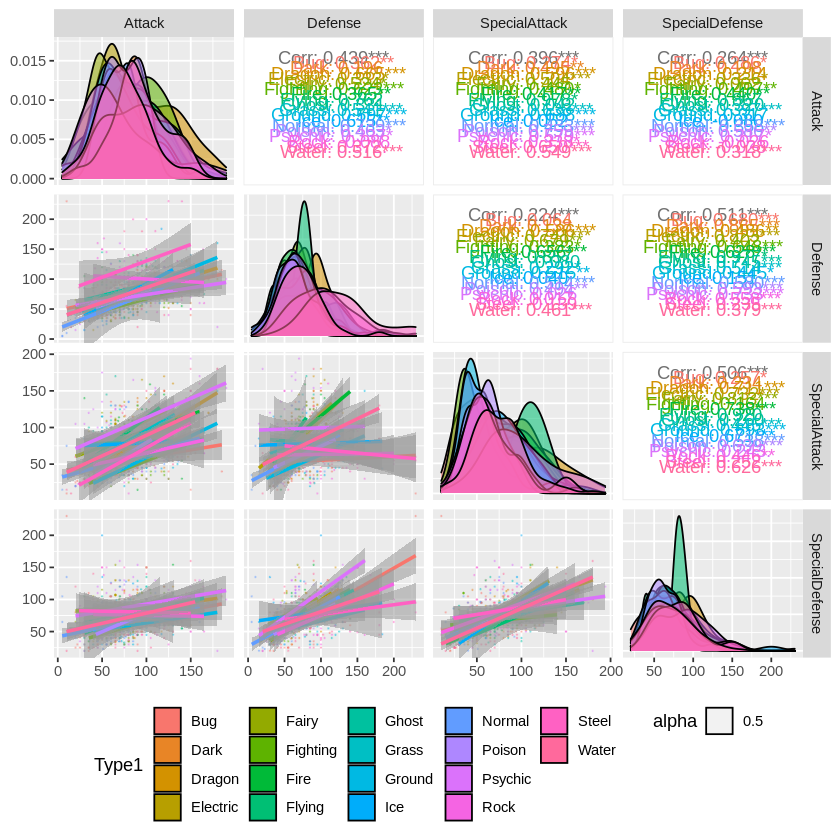

In [ ]:
library(GGally)
pokemon %>% ggpairs(legend = 1,
                     columns = c(7:10),
                     mapping = ggplot2::aes(colour = Type1, alpha = 0.5),
                     lower = list(continuous = wrap("smooth", alpha = 0.3, size=0.1))) +
  theme(legend.position = "bottom")

In [ ]:
# # Install packages if necessary
install.packages('FactoMineR')
install.packages('factoextra')

# Load packages
library(FactoMineR)
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# **Execute a PCA Analysis on all numerical variables**

In [ ]:
pr.pokemon <- prcomp(x = pokemon[, c(5:12)], scale = TRUE, center = TRUE)
summary(pr.pokemon)

Importance of components:
                         PC1    PC2    PC3     PC4    PC5     PC6    PC7
Standard deviation     1.988 1.0335 0.9800 0.87469 0.7731 0.62521 0.4932
Proportion of Variance 0.494 0.1335 0.1201 0.09564 0.0747 0.04886 0.0304
Cumulative Proportion  0.494 0.6276 0.7476 0.84324 0.9179 0.96680 0.9972
                           PC8
Standard deviation     0.14952
Proportion of Variance 0.00279
Cumulative Proportion  1.00000

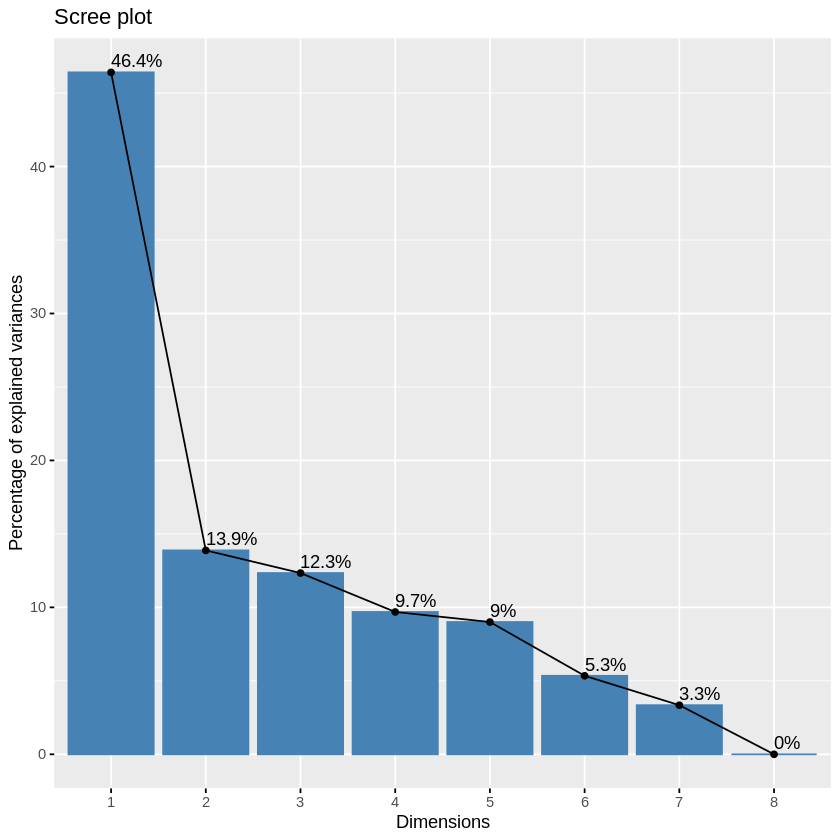

In [ ]:
pr.pokemon %>%
  fviz_screeplot(addlabels = TRUE,
                 ncp = 10,
                 ggtheme = theme_gray())

In [ ]:
str(pr.pokemon)

In [ ]:
pr.pokemon %>% get_pca_var()

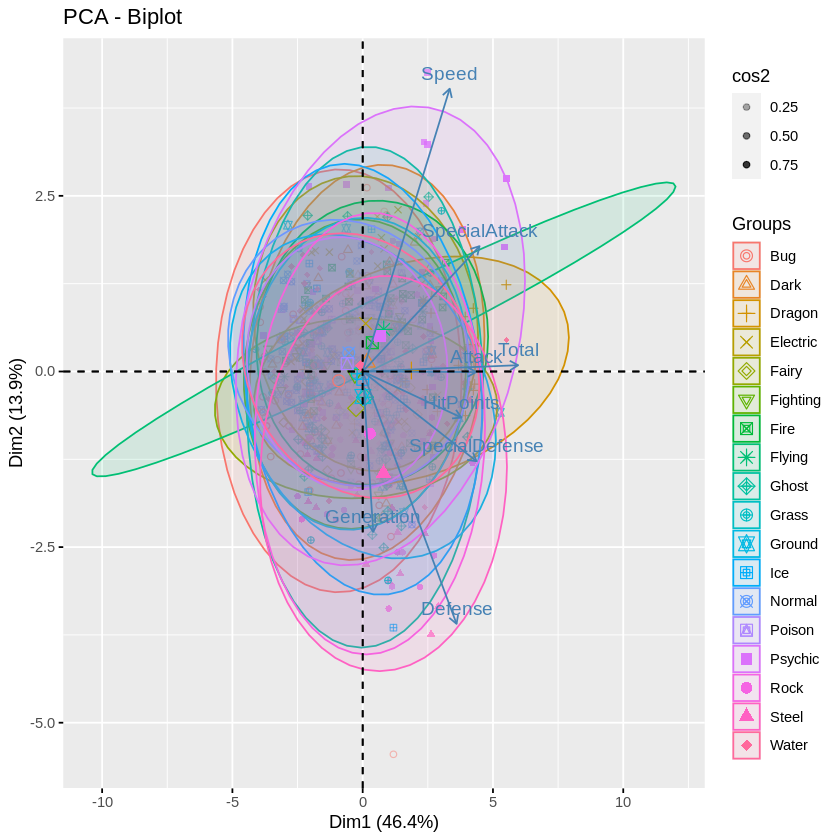

In [ ]:
pr.pokemon %>%
  fviz_pca_biplot(alpha.ind = "cos2",
                  geom = "point",
                  habillage = pokemon %>% pull(Type1) %>% factor(),
                  addEllipses = TRUE,
                  ggtheme = theme_gray())

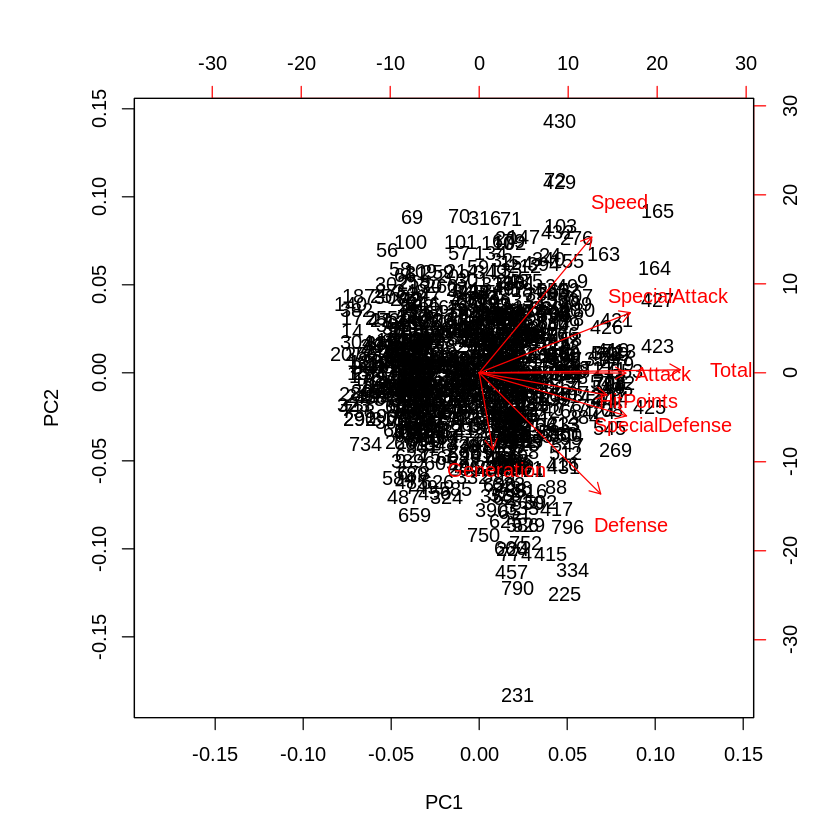

In [ ]:
biplot(pr.pokemon)

# **UMAP Analysis**

In [ ]:
install.packages('uwot')
library(uwot)

In [ ]:
res_umap <- pokemon %>%
  select_if(is_numeric) %>%
  umap(n_neighbors = 15,
       metric = "cosine",
       min_dist = 0.01,
       scale = TRUE)

In [ ]:
res_umap %>% as_tibble() %>%
  glimpse()

In [ ]:
res_umap %>%
  as_tibble() %>%
  bind_cols(pokemon %>% select(Type1, Type2)) %>%
  ggplot(aes(x = V1, y = V2, col = Type1)) +
  geom_point(shape = 21, alpha = 0.5)

In [ ]:
# We use the viz_nbclust() function of the factorextra package
pokemon %>%
  select_if(is_numeric) %>%
  scale() %>%
  fviz_nbclust(kmeans, method = "wss")

Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”


ERROR: ignored

# **KMean Clustering **

In [ ]:
km.pokemon <- kmeans(pokemon[, c(5:12)], centers = 4, nstart = 20)
km.pokemon

In [ ]:
str(km.pokemon)

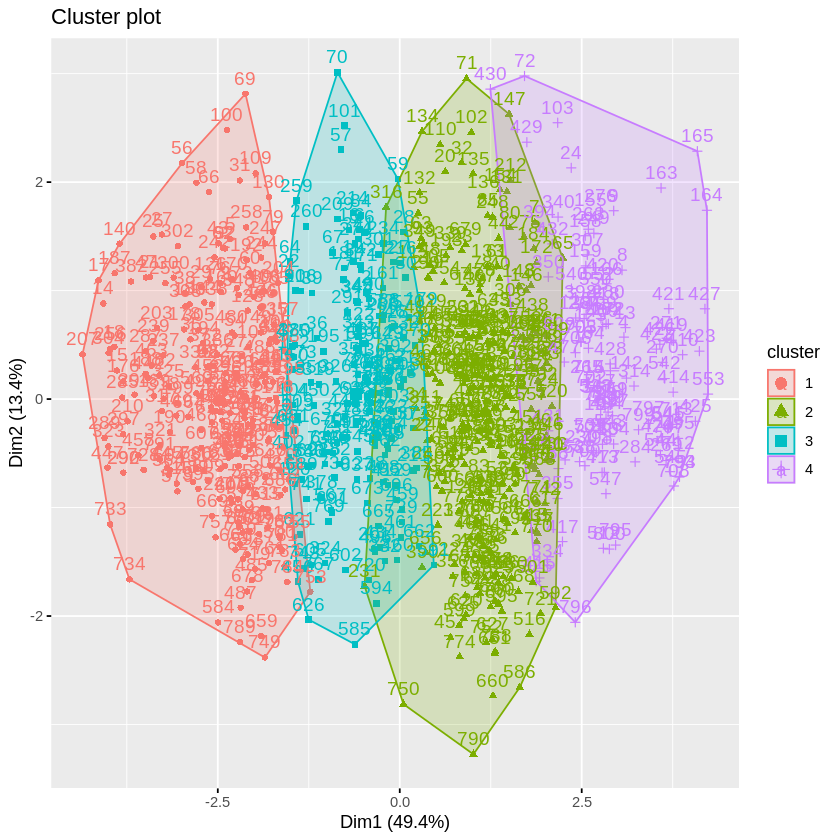

In [ ]:
km.pokemon %>%
  fviz_cluster(data = pokemon[, c(5:12)] ,
               ggtheme = theme_gray())

# Cluster **Analysis**

In [ ]:
hc_pokemon <- pokemon %>%
  select_if(is_double) %>%
  hcut(hc_func = "hclust",
       k = 4,
       stand = TRUE)

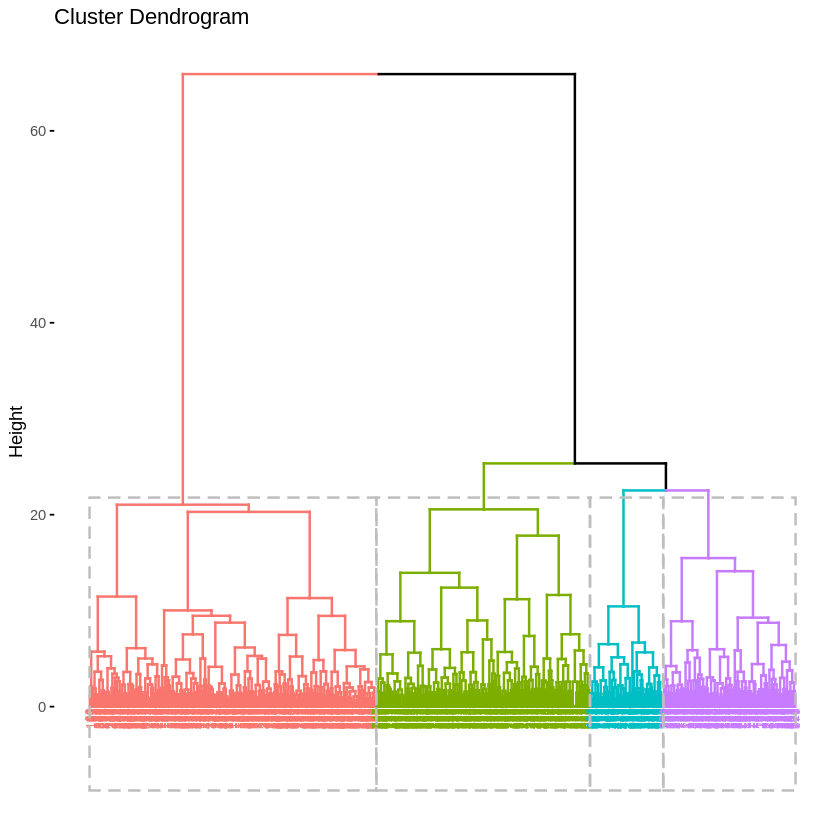

In [ ]:
hc_pokemon %>%
  fviz_dend(rect = TRUE, cex = 0.5)